In [ ]:
! pip install 'geopandas[all]'

In [3]:
%%bash
head -10 MO_pop_sim.csv

#The first column denotes if the residence is Urban or Rural
#The next two columns are longitude and latitude

UR,long,lat
R,-92.5062761212864,40.2792029061618
R,-92.5051318550842,40.276889612375
R,-92.5058899870041,40.2782423375098
R,-92.5198418278749,40.3277000831164
R,-92.524877366008,40.3295107045137
R,-92.5291823662756,40.3250413897606
R,-92.5324094395201,40.3249121413652
R,-92.526117330564,40.3264884161639
R,-92.5238984086017,40.3283689573053


In [5]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Read the shapefile
shapefile_path = "MO_2018_Federally_Qualified_Health_Center_Locations"
gdf = gpd.read_file(shapefile_path)

print(gdf.crs) # print the coordinate reference system
crs = gdf.crs
gdf = gdf.set_index("OBJECTID")

print(gdf.columns)
fqhc_df = gdf['geometry']
fqhc_df

EPSG:4326
Index(['Group_Name', 'Facility', 'Address', 'City', 'County', 'State', 'Zip',
       'Phone', 'Latitude', 'Longitude', 'Loc_Code', 'geometry'],
      dtype='object')


OBJECTID
1      POINT (-90.55472 38.43597)
2      POINT (-91.13403 37.71462)
3      POINT (-92.60144 38.16025)
4      POINT (-90.45724 36.77261)
5       POINT (-94.49886 38.9629)
                  ...            
193    POINT (-91.77391 37.94594)
194     POINT (-93.29166 37.2243)
195    POINT (-91.56258 36.56534)
196    POINT (-90.23025 38.67777)
197    POINT (-92.20212 38.56633)
Name: geometry, Length: 197, dtype: geometry

In [6]:
print(gdf.head(5))

                              Group_Name  \
OBJECTID                                   
1                                COMTREA   
2         Missouri Highlands Health Care   
3          Central Ozarks Medical Center   
4         Missouri Highlands Health Care   
5                  Swope Health Services   

                                                   Facility  \
OBJECTID                                                      
1                         COMTREA Byrnes Mill Health Center   
2                                   Viburnum Medical Clinic   
3                 Central Ozarks Medical Center At The Lake   
4         Missouri Highland Medical Clinic - Poplar Bluf...   
5                                Swope Health Hickman Mills   

                                       Address           City     County  \
OBJECTID                                                                   
1                   100 Osage Executive Circle  House Springs  Jefferson   
2                    

In [ ]:
# Convert gdf to a projected CRS (e.g., UTM zone 15N, which covers parts of Missouri)
gdf_projected = gdf.to_crs(epsg=26915)

# Convert 30 miles to meters (1 mile ≈ 1609.34 meters)
buffer_distance_meters = 30 * 1609.34

# Create the buffer (a true 30-mile radius in meters) in the projected CRS
circles_geom_projected = gdf_projected.buffer(buffer_distance_meters)

# Create a new GeoDataFrame with these buffered geometries in the projected CRS
fqhc_circles_df_projected = gpd.GeoDataFrame(gdf_projected, geometry=circles_geom_projected, crs=gdf_projected.crs)


fqhc_circles_df = fqhc_circles_df_projected.to_crs(crs)
fqhc_circles_df

,Group_Name,Facility,Address,City,County,State,Zip,Phone,Latitude,Longitude,Loc_Code,geometry
OBJECTID,,,,,,,,,,,,
1,COMTREA,COMTREA Byrnes Mill Health Center,100 Osage Executive Circle,House Springs,Jefferson,MO,63051,6367893372,38.435946,-90.554678,MAP,"POLYGON ((-90.0022 38.42313, -90.00662 38.3806..."
2,Missouri Highlands Health Care,Viburnum Medical Clinic,18 Viburnum Center Road,Viburnum,Iron,MO,65566,5732445406,37.714620,-91.133983,MAP,"POLYGON ((-90.58666 37.70468, -90.59067 37.662..."
3,Central Ozarks Medical Center,Central Ozarks Medical Center At The Lake,3870 Columbia Avenue,Osage Beach,Miller,MO,65065,5733027490,38.160258,-92.601463,MAP,"POLYGON ((-92.05038 38.15708, -92.05359 38.114..."
4,Missouri Highlands Health Care,Missouri Highland Medical Clinic - Poplar Bluf...,"225 Physicians Park Drive, Suite 303",Poplar Bluff,Butler,MO,63901,5737856536,36.772568,-90.457206,MAP,"POLYGON ((-89.91693 36.75983, -89.92123 36.717..."
5,Swope Health Services,Swope Health Hickman Mills,8800 Blue Ridge Boulevard,Kansas City,Jackson,MO,64138,8163213200,38.962882,-94.498847,MAP,"POLYGON ((-93.94169 38.96872, -93.94381 38.926..."
...,...,...,...,...,...,...,...,...,...,...,...,...
193,Your Community Health Center,Your Community Health Center - Health Department,"200 North Main, Suite G51",Rolla,Phelps,MO,65401,5734586950,37.945925,-91.773948,MAP,"POLYGON ((-91.22462 37.93893, -91.22829 37.896..."
194,Jordan Valley Community Health Center,Jordan Valley Community Health Center - Medica...,"1443 N. Roberson, Suite 505",Springfield,Greene,MO,65802,4178511554,37.224321,-93.291591,MAP,"POLYGON ((-92.74744 37.22439, -92.7502 37.1817..."
195,Southern Missouri Community Health Center,Oregon County Community Health Center,"US Highway 63 North (RR 3, Box 3703)",Thayer,Oregon,MO,65791,4172642990,36.565336,-91.562618,MAP,"POLYGON ((-91.02329 36.55762, -91.02697 36.515..."


In [9]:
def create_point_column(df, lon_col, lat_col, crs="EPSG:4326"):
    """
    Creates a geometry column of Point objects from longitude and latitude columns in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing longitude and latitude columns.
        lon_col (str): The name of the longitude column.
        lat_col (str): The name of the latitude column.
        crs (str, optional): Coordinate Reference System. Defaults to "EPSG:4326".

    Returns:
        geopandas.GeoDataFrame: A GeoDataFrame with the added geometry column.
    """

    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)
    return gdf

In [11]:
# Read the shapefile
pop_file_path = "Mo_pop_Sim.csv"  # Replace with the actual path
big_pop_df = pd.read_csv(pop_file_path)
pop_df = big_pop_df.sample(frac=0.01) 

pop_gdf = create_point_column(pop_df, 'long', 'lat', crs)
pop_gdf

print(pop_gdf.columns)

Index(['UR', 'long', 'lat', 'geometry'], dtype='object')


In [12]:
len(pop_gdf)

63325

In [13]:
pop_in_circles = gpd.sjoin(pop_gdf, fqhc_circles_df, predicate='within').groupby('OBJECTID').count()
pop_in_circles

,UR,long,lat,geometry,Group_Name,Facility,Address,City,County,State,Zip,Phone,Latitude,Longitude,Loc_Code
OBJECTID,,,,,,,,,,,,,,,
1,19572,19572,19572,19572,19572,19572,19572,19572,19572,19572,19572,19572,19572,19572,19572
2,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737
3,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
4,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103
5,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505
194,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545
195,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469


In [ ]:
# Re-project pop_gdf to the same projected CRS as your facility data (e.g., EPSG:26915)
pop_gdf_projected = pop_gdf.to_crs(epsg=26915)

# Now perform the nearest neighbor spatial join in the projected CRS.
# This finds, for each population point, the closest facility.
closest_fqhc_projected = gpd.sjoin_nearest(pop_gdf_projected, gdf_projected, how="left", distance_col="distance")

closest_fqhc = closest_fqhc_projected.to_crs(crs)
closest_fqhc


,UR,long,lat,geometry,OBJECTID,Group_Name,Facility,Address,City,County,State,Zip,Phone,Latitude,Longitude,Loc_Code,distance
2317420,U,-94.370042,38.934200,POINT (-94.37004 38.9342),5,Swope Health Services,Swope Health Hickman Mills,8800 Blue Ridge Boulevard,Kansas City,Jackson,MO,64138,8163213200,38.962882,-94.498847,MAP,11610.222725
4285119,U,-90.747188,38.780789,POINT (-90.74719 38.78079),50,Compass Health,Compass Health/Crider Health Center (Behaviora...,1032 Crosswinds Court,Wentzville,St. Charles,MO,63385,6363326000,38.803048,-90.817251,MAP,6571.335052
3754140,R,-91.551605,37.927244,POINT (-91.55161 37.92724),193,Your Community Health Center,Your Community Health Center - Health Department,"200 North Main, Suite G51",Rolla,Phelps,MO,65401,5734586950,37.945925,-91.773948,MAP,19647.379264
1948241,R,-91.894654,36.802185,POINT (-91.89465 36.80219),143,Southern Missouri Community Health Center,Southern Missouri Community Health Center,1137 Independence Drive,West Plains,Howell,MO,65775,4172558464,36.745040,-91.869907,MAP,6687.231981
3683718,R,-90.024883,37.670707,POINT (-90.02488 37.67071),159,Cross Trails Medical Center,Cross Trails Dental Center,1314 Brenda Ave,Perryville,Perry,MO,63775,5735170405,37.719850,-89.884419,MAP,13540.231277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456714,R,-90.771365,38.536814,POINT (-90.77137 38.53681),51,Compass Health,Compass Health/Crider Health Center (Dental Se...,"1780 Old Hwy. 50 East, Suite 111",Union,Franklin,MO,63084,6365832251,38.436509,-90.952929,MAP,19362.548666
964179,R,-94.493009,39.308058,POINT (-94.49301 39.30806),129,Samuel U. Rodgers Health Center,Samuel U. Rodgers Health Center-Clay County Fa...,800 Haines Drive,Liberty,Clay,MO,64068,8164130662,39.257031,-94.451666,MAP,6691.429248
5172673,U,-90.629839,38.569980,POINT (-90.62984 38.56998),158,COMTREA,COMTREA High Ridge (Medical),324 Emerson Road,High Ridge,Jefferson,MO,63049,6366779977,38.483929,-90.504629,MAP,14508.067007
6407,R,-92.586092,40.343711,POINT (-92.58609 40.34371),108,Northeast Missouri Health Council,Northeast Missouri Health Council (Administrat...,1416 Crown Drive,Kirksville,Adair,MO,63501,6606275757,40.206793,-92.573250,MAP,15235.501575


In [17]:
count = closest_fqhc.groupby('OBJECTID').count()
count

,UR,long,lat,geometry,Group_Name,Facility,Address,City,County,State,Zip,Phone,Latitude,Longitude,Loc_Code,distance
OBJECTID,,,,,,,,,,,,,,,,
1,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
2,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235
3,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433
4,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
5,1591,1591,1591,1591,1591,1591,1591,1591,1591,1591,1591,1591,1591,1591,1591,1591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436
194,716,716,716,716,716,716,716,716,716,716,716,716,716,716,716,716
195,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129


In [ ]:
import random

# GA parameters
POPULATION_SIZE = 300    
NUM_GENERATIONS = 100   
NUM_FACILITIES = 8      
MUTATION_RATE = 0.1     


all_facilities = list(gdf.index)

pop_counts = pop_in_circles['long']

def fitness(candidate):
    return sum(pop_counts.get(fac, 0) for fac in candidate)

def selection(population):
    fitness_values = [fitness(candidate) for candidate in population]
    total_fitness = sum(fitness_values)
    pick = random.uniform(0, total_fitness)
    current = 0
    for candidate, fit in zip(population, fitness_values):
        current += fit
        if current > pick:
            return candidate

def crossover(parent1, parent2):
    point = random.randint(1, NUM_FACILITIES - 1)
    child = parent1[:point] + [fac for fac in parent2 if fac not in parent1[:point]]
    while len(child) < NUM_FACILITIES:
        candidate = random.choice(all_facilities)
        if candidate not in child:
            child.append(candidate)
    return child[:NUM_FACILITIES]

def mutate(candidate):
    if random.random() < MUTATION_RATE:
        index_to_replace = random.randint(0, NUM_FACILITIES - 1)
        new_facility = random.choice(all_facilities)
        while new_facility in candidate:
            new_facility = random.choice(all_facilities)
        candidate[index_to_replace] = new_facility
    return candidate

In [30]:
# Initialize the population with random candidates
population = [random.sample(all_facilities, NUM_FACILITIES) for _ in range(POPULATION_SIZE)]
best_candidate = None
best_fitness = 0

# Create a list to record best fitness at each generation
best_fitness_history = []

# Main GA Loop
for generation in range(NUM_GENERATIONS):
    new_population = []
    for _ in range(POPULATION_SIZE):
        parent1 = selection(population)
        parent2 = selection(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)
        child_fit = fitness(child)
        if child_fit > best_fitness:
            best_fitness = child_fit
            best_candidate = child
    population = new_population
    best_fitness_history.append(best_fitness)
    print(f"Generation {generation}, Best Fitness: {best_fitness}")

print("Optimal set of FQHCs:", best_candidate)
print("Total population served:", best_fitness)


Generation 0, Best Fitness: 96448
Generation 1, Best Fitness: 97851
Generation 2, Best Fitness: 107137
Generation 3, Best Fitness: 108186
Generation 4, Best Fitness: 118255
Generation 5, Best Fitness: 128957
Generation 6, Best Fitness: 128957
Generation 7, Best Fitness: 140614
Generation 8, Best Fitness: 141098
Generation 9, Best Fitness: 149472
Generation 10, Best Fitness: 149472
Generation 11, Best Fitness: 149472
Generation 12, Best Fitness: 149472
Generation 13, Best Fitness: 149845
Generation 14, Best Fitness: 149845
Generation 15, Best Fitness: 150033
Generation 16, Best Fitness: 151080
Generation 17, Best Fitness: 151080
Generation 18, Best Fitness: 151080
Generation 19, Best Fitness: 151080
Generation 20, Best Fitness: 151080
Generation 21, Best Fitness: 151080
Generation 22, Best Fitness: 152758
Generation 23, Best Fitness: 152929
Generation 24, Best Fitness: 152929
Generation 25, Best Fitness: 152929
Generation 26, Best Fitness: 152929
Generation 27, Best Fitness: 152929
Gene

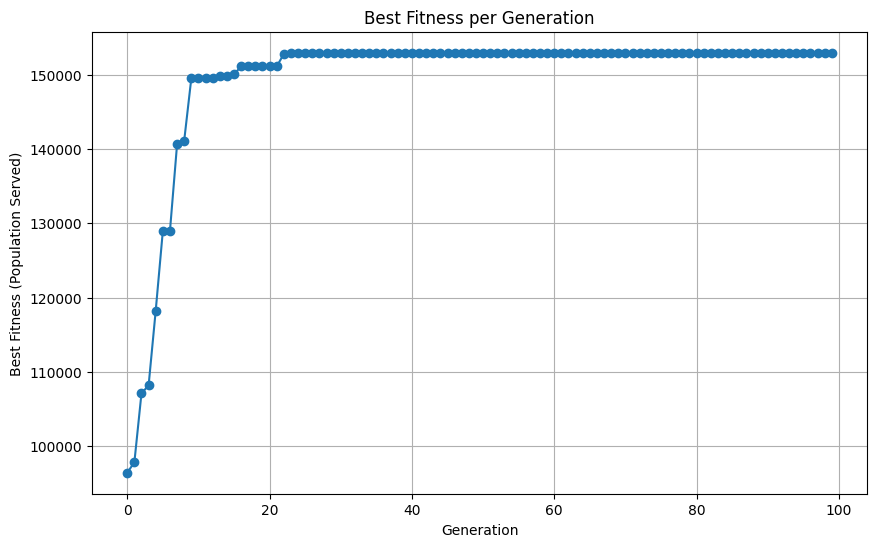

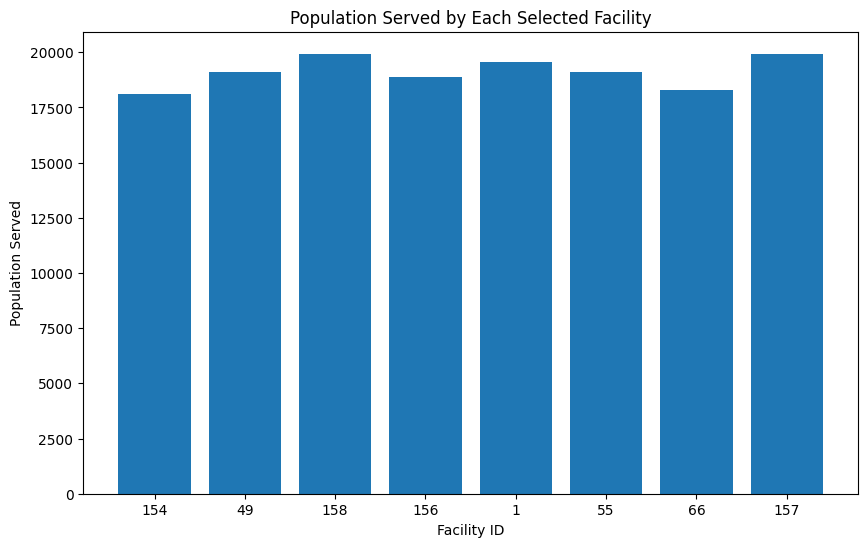

In [ ]:
import matplotlib.pyplot as plt

# Plot: Best Fitness Over Generations
plt.figure(figsize=(10, 6))
plt.plot(best_fitness_history, marker='o', linestyle='-')
plt.title("Best Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Best Fitness (Population Served)")
plt.grid(True)
plt.show()

# Plot: Population Served by Each Selected Facility
pop_served = [pop_counts.get(fac, 0) for fac in best_candidate]

plt.figure(figsize=(10, 6))
plt.bar([str(fac) for fac in best_candidate], pop_served)
plt.title("Population Served by Each Selected Facility")
plt.xlabel("Facility ID")
plt.ylabel("Population Served")
plt.show()


In evaluating the relative suitability of potential locations, we considered two primary methods:

1. Average Distance to Residences  
   This approach involves calculating the average distance from each location to all residences. A location with a lower average distance is more centrally positioned and, theoretically, more accessible. The assumption is that reducing the average travel distance increases accessibility and service utilization.

2. Number of Residences Within a 30-Mile Radius (Density)  
   This method counts the number of residences located within 30 miles of each location. A higher count suggests that the facility could serve a larger population. The underlying assumption is that residents within this radius are more likely to use the facility, making locations with a higher density of nearby residences more favorable.

### Selected Approach

I chose the number of residences within a 30-mile radius as the primary criterion. This decision aims to maximize the total number of people served by the new specialized mental health services. From a public health perspective, it is generally more beneficial to select locations that provide the greatest coverage, even if it results in slightly longer travel distances for some residents.

### Assumptions

1. 30-Mile Service Radius  
   It is assumed that 30 miles represents a reasonable distance for individuals to travel for mental health services.

2. Equal Accessibility  
   All residents within the 30-mile radius are considered equally served, without adjustments for factors such as urban versus rural differences or transportation challenges.

3. Overlapping Coverage  
   When evaluating individual locations, potential overlap with other facilities is not considered. If selecting multiple locations in the future, a decision will be made on whether to count overlapping residents once (unique coverage) or multiple times (summed coverage). For the current evaluation, the focus is on each location’s ability to serve residents within its 30-mile range independently.

### Fitness Measure

The suitability of a location is determined by the number of residents within 30 miles. The objective is to maximize this value, meaning a location with a greater number of residents within its 30-mile radius is considered more favorable.

In cases where multiple facilities are selected, the total count can either be summed across facilities (allowing for potential double-counting) or adjusted to reflect the unique number of residents served within the combined service areas. The primary goal remains to maximize coverage and accessibility.

